# Sentiment Analysis - Task 4

## Importing neccesary Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [19]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ["tweet_id", "brand", "sentiment", "text"]

In [20]:
df['sentiment'] = df['sentiment'].replace('Irrelevant', 'Neutral')

## I have chosen the interest of brand to analyse sentiment for is BorderLand

In [21]:
borderlands_df = df[df['brand'] == "Borderlands"]

In [22]:
borderlands_df.head()

,tweet_id,brand,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Text Preprocessing and Analysis

In [23]:

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) 
    text = re.sub(r"@\w+", "", text)                     
    text = re.sub(r"[^a-z\s]", "", text)                 
    return text


In [24]:
borderlands_df['clean_text'] = borderlands_df['text'].apply(clean_text)

/tmp/ipykernel_7267/4101670566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borderlands_df['clean_text'] = borderlands_df['text'].apply(clean_text)


In [25]:
sent_counts = borderlands_df['sentiment'].value_counts()

In [26]:
print(sent_counts)

sentiment
Positive    1020
Neutral      840
Negative     426
Name: count, dtype: int64


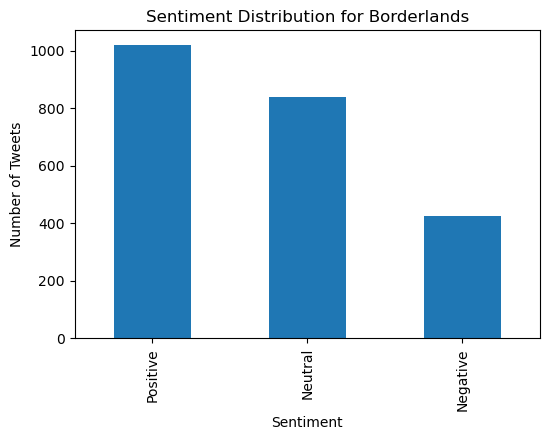

In [27]:
plt.figure(figsize=(6,4))
sent_counts.plot(kind='bar')
plt.title("Sentiment Distribution for Borderlands")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


In [29]:
borderlands_df[borderlands_df['sentiment']=="Negative"].head()


,tweet_id,brand,sentiment,text,clean_text
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,the biggest dissappoinment in my life came out...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,the biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,the biggest disappointment of my life came a y...
27,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...,the biggest dissappoinment in my life coming o...
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...,for the biggest male dissappoinment in my life...


In [30]:
borderlands_df[borderlands_df['sentiment']=="Positive"].head()


,tweet_id,brand,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [31]:
borderlands_df[borderlands_df['sentiment']=="Neutral"].head()


,tweet_id,brand,sentiment,text,clean_text
12,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",rockhard la varlope rare powerful handsome ja...
13,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",rockhard la varlope rare powerful handsome ja...
14,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",rockhard la varlope rare powerful handsome ja...
15,2403,Borderlands,Neutral,"Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",rockhard la vita rare but powerful handsome ja...
16,2403,Borderlands,Neutral,"Live Rock - Hard music La la Varlope, RARE & t...",live rock hard music la la varlope rare the ...


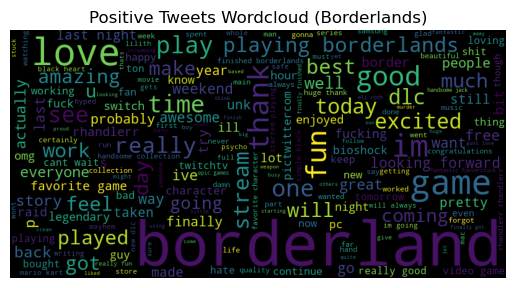

In [33]:
text_pos = " ".join(borderlands_df[borderlands_df['sentiment']=="Positive"]['clean_text'])
wc = WordCloud(width=800, height=400).generate(text_pos)
plt.imshow(wc)
plt.axis("off")
plt.title("Positive Tweets Wordcloud (Borderlands)")
plt.show()
